# 4-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [377]:
#https://www.kaggle.com/c/bike-sharing-demand/data
# #데이터 설명

# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [378]:
import pandas as pd
import numpy as np
riding = pd.read_csv("data/train.csv")
riding.head(60)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [379]:
riding.shape

(10886, 12)

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [380]:
print(riding.datetime.dtype)

object


In [381]:
riding.datetime = pd.to_datetime(riding.datetime, infer_datetime_format=True)

In [382]:
print(riding.datetime.dtype)

datetime64[ns]


In [383]:
year = riding.datetime.dt.year
year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [384]:
month = riding.datetime.dt.month
month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [385]:
day = riding.datetime.dt.day
day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [386]:
hour = riding.datetime.dt.hour
hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

In [387]:
minute = riding.datetime.dt.minute
minute

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [388]:
second = riding.datetime.dt.second
second

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [389]:
import seaborn as sns

In [390]:
import seaborn as sns
# sns.set_theme(style="whitegrid")


# print(sns.countplot(x=year))


AxesSubplot(0.125,0.11;0.775x0.77)


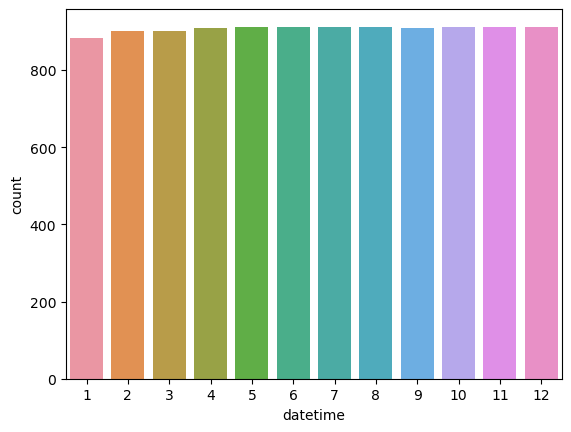

In [391]:
print(sns.countplot(x=month))


AxesSubplot(0.125,0.11;0.775x0.77)


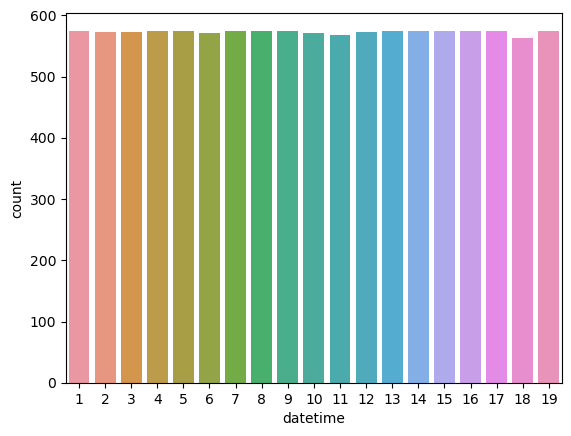

In [392]:
print(sns.countplot(x=day))

AxesSubplot(0.125,0.11;0.775x0.77)


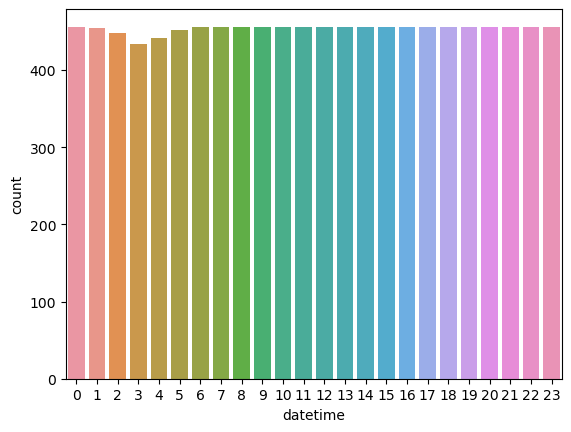

In [393]:
print(sns.countplot(x=hour))

AxesSubplot(0.125,0.11;0.775x0.77)


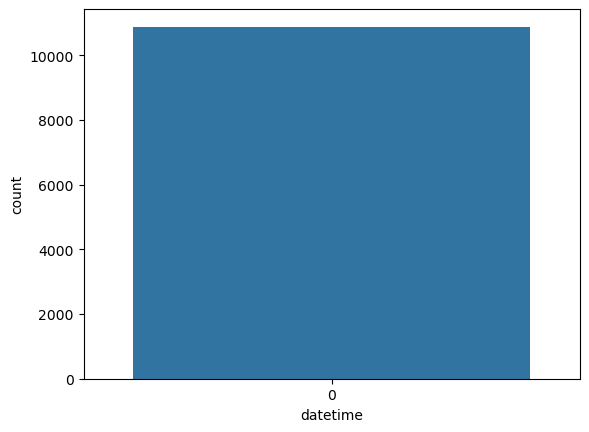

In [394]:
print(sns.countplot(x=minute))

AxesSubplot(0.125,0.11;0.775x0.77)


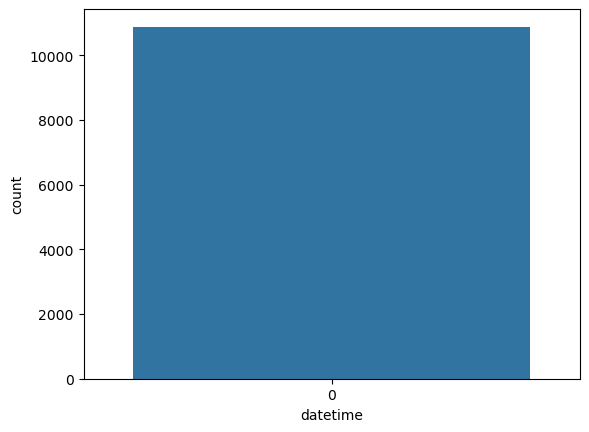

In [395]:

print(sns.countplot(x=second))

<AxesSubplot:xlabel='datetime', ylabel='count'>

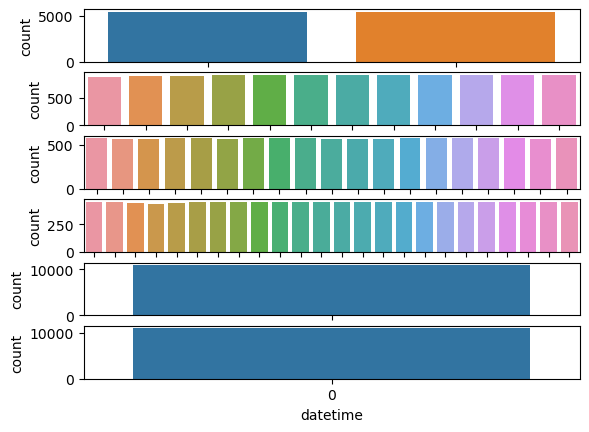

In [396]:
import matplotlib.pyplot as plt

plt.subplot(6, 1, 1)
sns.countplot(x=year)
plt.subplot(6, 1, 2)
sns.countplot(x=month)
plt.subplot(6, 1, 3)   
sns.countplot(x=day)
plt.subplot(6, 1, 4)   
sns.countplot(x=hour)
plt.subplot(6, 1, 5)   
sns.countplot(x=minute)
plt.subplot(6, 1, 6)   
sns.countplot(x=second)

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [397]:
# riding 함수를 찍어보자
riding

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


datetime에서 분이랑 초는 데이터가 1개 이므로, 차별성이 없다. 나머지는 약간의 차이가 있는 것 같으니.. dataflame에 추가해보자.

In [398]:
#원본 데이터 보존을 위해 라이딩을 납두고, 뉴라이딩 데이터프레임을 만들자
new_riding = riding

#거기에 시간 데이터들을 넣어주자
new_riding['year'] = year
new_riding['month'] = month
new_riding['day'] = day
new_riding['hour'] = hour

#datetime은 날려주자.
new_riding.drop('datetime', axis=1, inplace=True)

new_riding

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [399]:
#학습을 위해 count는 분리시키자.

y_data = new_riding['count']
y_data

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [400]:
#본판에는 카운드 드랍시키자.

new_riding.drop('count', axis=1, inplace=True)
new_riding.drop('casual', axis=1, inplace=True)
new_riding.drop('registered', axis=1, inplace=True)
new_riding




,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [404]:
from sklearn.model_selection import train_test_split

In [405]:
X_train, X_test, y_train, y_test = train_test_split(new_riding, y_data, test_size=0.2, random_state=2022)

In [432]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
1550,2,0,0,2,16.40,20.455,87,8.9981,2011,4,10,11
6454,1,0,1,1,7.38,8.335,51,19.9995,2012,3,6,4
813,1,0,1,1,13.12,16.665,57,6.0032,2011,2,17,8
7069,2,0,1,1,17.22,21.210,35,12.9980,2012,4,12,22
3217,3,0,1,2,27.88,31.820,89,6.0032,2011,8,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...
6384,1,0,0,2,14.76,18.180,93,6.0032,2012,3,3,6
4720,4,0,1,1,18.04,21.970,67,7.0015,2011,11,9,18
173,1,0,0,2,8.20,9.090,59,23.9994,2011,1,8,12
1244,1,0,1,2,16.40,20.455,76,11.0014,2011,3,16,16


In [407]:
X_test.shape

(2178, 12)

In [408]:
y_train.shape

(8708,)

In [409]:
y_test.shape

(2178,)

## (5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [433]:
from sklearn.linear_model import LinearRegression

In [434]:
#학습!
reg = LinearRegression().fit(X_train, y_train)
reg


LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [412]:
y_pred = reg.predict(X_test)
y_pred

array([356.917821  , 209.03407989, 178.27234862, ..., 229.62702921,
       291.14188512,  -1.34702627])

In [436]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

20086.110061743024

In [437]:
rmse = np.sqrt(mse)
rmse

141.72547428653405

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [418]:
import matplotlib.pyplot as plt

In [440]:
y_pred

array([356.917821  , 209.03407989, 178.27234862, ..., 229.62702921,
       291.14188512,  -1.34702627])

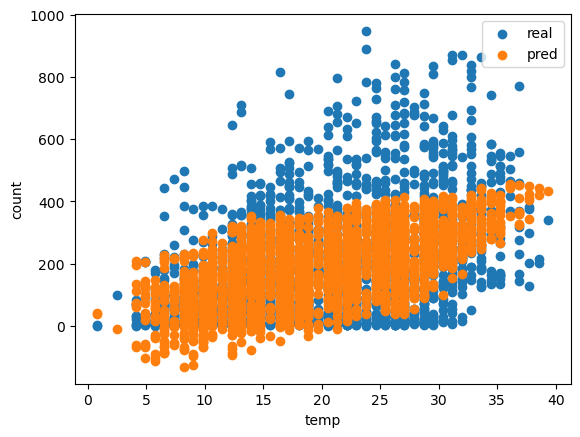

In [447]:
plt.scatter(X_test['temp'], y_test, label="real")
plt.scatter(X_test['temp'], y_pred, label="pred")

plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

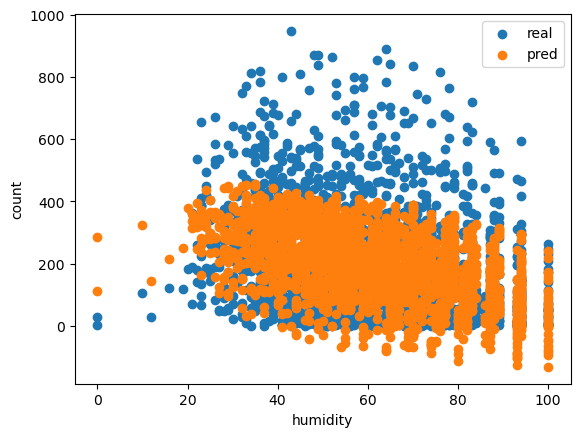

In [450]:
plt.scatter(X_test['humidity'], y_test, label="real")
plt.scatter(X_test['humidity'], y_pred, label="pred")

plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

회고

casual, registered 를 안빼서 오차가 거의 제로에 가깝게 나왔다. 정답을 100% 유추할 수 있는 지표가 있는데, 오차가 제로가 아닐리가 없지.. 허허; 

제거 후에야 의미있는 값이 나왔다.

정규화 하다가 망함....(정규화 시켜본 코드)

--------------------------------

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

new_riding = scaler.fit_transform(new_riding)
new_riding[0]
new_riding.shape

#y_data도 표준화 해주는게 좋을까 싶어서.. 시도해보니, 그냥 y_data로는 안되더라. 데이터프레임으로 변환 후, 민맥스함수 이용해 해결
y_data = pd.DataFrame(y_data)
y_data = scaler.fit_transform(y_data)
y_data


-------------------------------

정규화 자체가 나쁜 건 아닌 것 같은데, 변환 방법을 알지 못해서.. 해보질 못했다.. 
시간이 허락된다면, 정규화를 시키고 다시 원상복구 시켜서 비교해보고싶다.



scatter를 아직 잘 모른다. plt.scatter(X_test['humidity'], y_test, label="real")

X_test['humidity'] 여기부분이 데이터프레임만 들어간다는 것을 알았다. 
아직 데이터프레임으로 변환하는 것 조차 익숙하지 않아서, 매번 검색을 통해 들어간다.(시간소요가.. ㄷㄷ)